In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Read data
df = pd.read_csv(r'C:\Users\jeanb\Desktop\PF-Website\Movie correlation\movies.csv')

In [3]:
# Now let's take a look at the data

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
df['yearcorrect'] = df['released'].astype(str).str.split().str[2]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020


In [5]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 28.0%
gross - 2.0%
company - 0.0%
runtime - 0.0%
yearcorrect - 0.0%


In [6]:
# Supprimer les lignes avec des valeurs manquantes dans la colonne "gross"
df.dropna(subset=['gross'], inplace=True)

In [7]:
# Sélectionner les films avec des valeurs manquantes dans la colonne gross
missing_budget = df[df['budget'].isnull()]

# Afficher les années de sortie des films avec des valeurs manquantes dans la colonne gross
print(missing_budget['year'])


16      1980
19      1980
24      1980
25      1980
26      1980
        ... 
7653    2020
7655    2020
7656    2020
7657    2020
7659    2020
Name: year, Length: 2043, dtype: int64


In [8]:
# Compter le nombre de films avec des valeurs manquantes dans la colonne gross par année de sortie et ordonner par année
missing_budget_by_year = missing_budget['year'].value_counts().sort_index()

# Afficher le résultat
print(missing_budget_by_year)

#pas de pattern repéré selon l'année de sortie. on doit donc remplacer les valeurs

1980    41
1981    41
1982    48
1983    45
1984    68
1985    82
1986    87
1987    84
1988    61
1989    73
1990    80
1991    82
1992    59
1993    55
1994    70
1995    59
1996    55
1997    49
1998    46
1999    32
2000    33
2001    34
2002    27
2003    41
2004    42
2005    30
2006    36
2007    43
2008    28
2009    29
2010    34
2011    39
2012    37
2013    39
2014    37
2015    43
2016    41
2017    67
2018    57
2019    82
2020     7
Name: year, dtype: int64


In [9]:
# Sélectionner les colonnes nécessaires pour l'entraînement du modèle
selected_features = ['year', 'score', 'votes', 'gross', 'budget']
df_selected = df[selected_features]

# Diviser les données en ensembles d'entraînement et de test
# Supprimer les lignes avec des valeurs manquantes dans les colonnes sélectionnées pour l'ensemble d'entraînement
df_train = df_selected.dropna()

# Séparer les fonctionnalités et la cible
X_train = df_train.drop(columns=['budget'])
y_train = df_train['budget']

# Entraîner un modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les valeurs manquantes dans la colonne "budget" pour l'ensemble complet
X_missing = df_selected[df_selected['budget'].isnull()].drop(columns=['budget'])
y_missing_pred = model.predict(X_missing)

# Remplacer les valeurs manquantes par les prédictions du modèle
df.loc[df['budget'].isnull(), 'budget'] = y_missing_pred

# Vérifier la distribution des valeurs imputées
print("Distribution des valeurs imputées :")
print(df['budget'].describe())

Distribution des valeurs imputées :
count    7.479000e+03
mean     3.137638e+07
std      3.653593e+07
min      6.000000e+03
25%      1.120021e+07
50%      2.000000e+07
75%      3.500000e+07
max      3.560000e+08
Name: budget, dtype: float64


In [10]:
# Data Types for our columns

print(df.dtypes)

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect     object
dtype: object


In [11]:
#changing the data type

df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,33173433,3661,Prowess Pictures,98.0,2020
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,65763017,240663149,Beijing Enlight Pictures,110.0,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,35045929,413378,Pryor Entertainment,120.0,2020
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,31333906,25818882,NaN,135.0,2020


In [12]:
#duplicates
df.drop_duplicates()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,33173433,3661,Prowess Pictures,98.0,2020
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,65763017,240663149,Beijing Enlight Pictures,110.0,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,35045929,413378,Pryor Entertainment,120.0,2020
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,31333906,25818882,NaN,135.0,2020


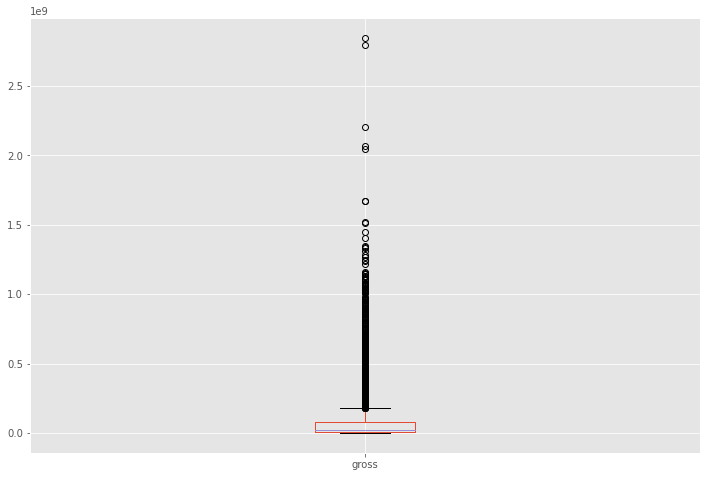

In [13]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [14]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,17684638,1400,British Broadcasting Corporation (BBC),103.0,2001
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,31271779,790,Visual Arts Entertainment,104.0,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,33548378,682,Roxwell Films,93.0,2020
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


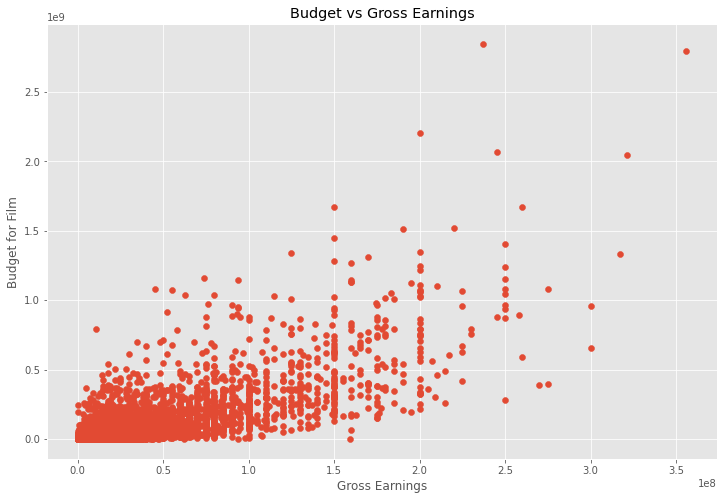

In [15]:
# scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

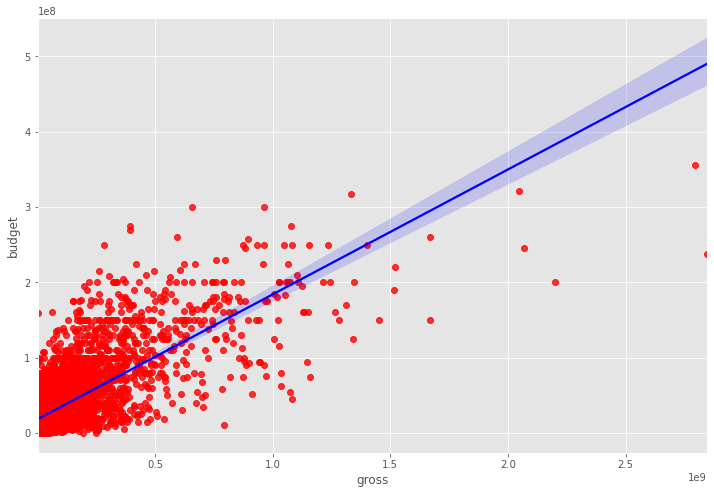

In [16]:
# Plot Budget vs Gross using seaborn

sns.regplot(x="gross", y="budget", data=df, scatter_kws={'color':'red'},line_kws={'color':'blue'})


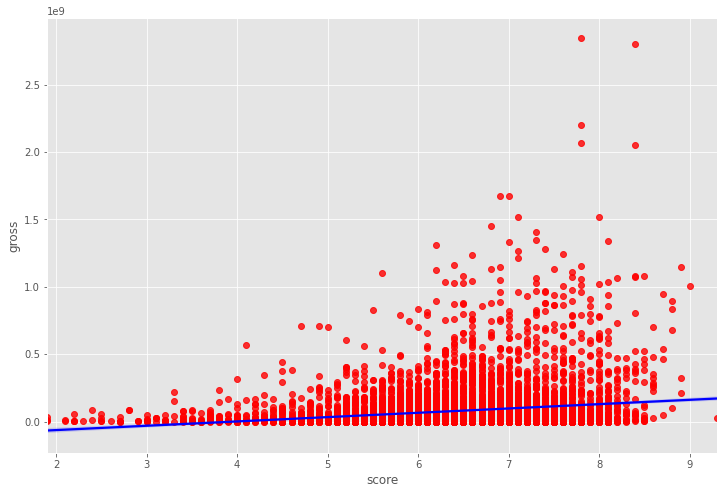

In [17]:
sns.regplot(x="score", y="gross", data=df, scatter_kws={'color':'red'},line_kws={'color':'blue'})


In [18]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')



,year,score,votes,budget,gross,runtime
year,1.000000,0.091821,0.215740,0.337954,0.257486,0.114706
score,0.091821,1.000000,0.413096,0.038675,0.186258,0.397321
votes,0.215740,0.413096,1.000000,0.462286,0.630757,0.309536
budget,0.337954,0.038675,0.462286,1.000000,0.751670,0.273549
gross,0.257486,0.186258,0.630757,0.751670,1.000000,0.245216
runtime,0.114706,0.397321,0.309536,0.273549,0.245216,1.000000


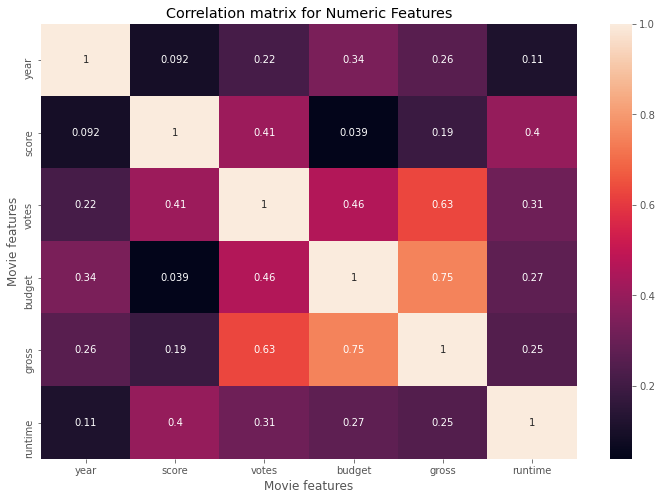

In [19]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [20]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,0.143094,0.031953,0.965203,0.959315,-0.041478,0.284439,0.743578,0.801538,0.729960,0.152811,0.376514,0.965254,0.595797,0.045565,0.809068
rating,0.143094,1.000000,-0.081685,0.156473,0.145223,0.013380,0.099046,0.087490,0.105165,0.097033,0.014204,0.096120,0.153166,-0.024672,0.036474,0.135561
genre,0.031953,-0.081685,1.000000,0.033758,0.032257,-0.006677,0.021869,0.043267,0.028524,0.035276,-0.021250,-0.023516,0.034227,0.007297,0.003410,0.027379
year,0.965203,0.156473,0.033758,1.000000,0.993563,-0.039538,0.309352,0.768131,0.821667,0.754802,0.149644,0.381079,0.998875,0.605164,0.047870,0.838640
released,0.959315,0.145223,0.032257,0.993563,1.000000,-0.040269,0.296267,0.769235,0.816563,0.754347,0.156932,0.384685,0.994050,0.612206,0.044341,0.824928
score,-0.041478,0.013380,-0.006677,-0.039538,-0.040269,1.000000,-0.004147,-0.020826,-0.030289,-0.003660,0.035414,-0.020470,-0.038015,-0.023062,0.032825,-0.035152
votes,0.284439,0.099046,0.021869,0.309352,0.296267,-0.004147,1.000000,0.182316,0.217268,0.170507,-0.045578,0.133290,0.296289,0.003747,0.109896,0.266668
director,0.743578,0.087490,0.043267,0.768131,0.769235,-0.020826,0.182316,1.000000,0.746280,0.680895,0.165335,0.310390,0.770307,0.555382,-0.017851,0.626818
writer,0.801538,0.105165,0.028524,0.821667,0.816563,-0.030289,0.217268,0.746280,1.000000,0.673078,0.170695,0.328940,0.822181,0.547618,0.028277,0.692807
star,0.729960,0.097033,0.035276,0.754802,0.754347,-0.003660,0.170507,0.680895,0.673078,1.000000,0.191189,0.334280,0.756032,0.532684,0.031346,0.624111


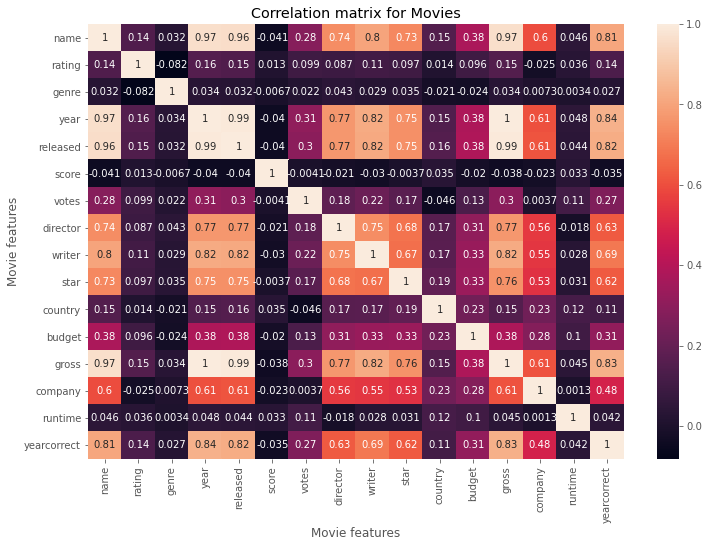

In [21]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [22]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating         0.143094
             genre          0.031953
             year           0.965203
             released       0.959315
                              ...   
yearcorrect  budget         0.314991
             gross          0.834024
             company        0.484702
             runtime        0.041834
             yearcorrect    1.000000
Length: 256, dtype: float64


In [23]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre        rating        -0.081685
rating       genre         -0.081685
country      votes         -0.045578
votes        country       -0.045578
score        name          -0.041478
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64


In [24]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

company      star           0.532684
star         company        0.532684
company      writer         0.547618
writer       company        0.547618
company      director       0.555382
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 86, dtype: float64


In [ ]:
#votes and budget have the highest correlations

In [25]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6428,6,6,1980,1669,8.4,927000.0,2500,3890,994,52,19000000,46998772,2213,146.0,2
1,5426,6,1,1980,1460,5.8,65000.0,2189,1578,313,53,4500000,58853106,701,104.0,2
2,5006,4,0,1980,1733,8.7,1200000.0,1072,2485,1666,53,18000000,538375067,1470,124.0,2
3,280,4,4,1980,1460,7.7,221000.0,1260,1936,2146,53,3500000,83453539,1728,88.0,2
4,1001,6,4,1980,1509,7.3,108000.0,1019,507,394,53,6000000,39846344,1695,98.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,6321,6,5,2020,91,5.4,2400.0,2430,3760,2336,53,33173433,3661,1817,98.0,42
7655,3105,9,2,2020,2748,6.6,1300.0,2620,-1,885,8,65763017,240663149,360,110.0,42
7656,6851,5,4,2020,1847,5.0,294.0,2425,3753,2276,53,35045929,413378,1819,120.0,42
7657,3088,-1,6,2020,3205,6.7,903.0,2112,1932,870,8,31333906,25818882,-1,135.0,42


In [26]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company  year
2210     2019    5773131804
1532     2018    4018631866
2175     2015    3834354888
2148     2009    3793491246
2210     2017    3789382071
1728     2011    3565705182
2213     2010    3300479986
         2011    3223799224
2210     2010    3104474158
1728     2014    3071298586
701      2006    2934631933
         2019    2932757449
1532     2019    2797501328
2213     2018    2774168962
701      2011    2738363306
Name: gross, dtype: int64

In [27]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6428,6,6,1980,1669,8.4,927000.0,2500,3890,994,52,19000000,46998772,2213,146.0,2
1,5426,6,1,1980,1460,5.8,65000.0,2189,1578,313,53,4500000,58853106,701,104.0,2
2,5006,4,0,1980,1733,8.7,1200000.0,1072,2485,1666,53,18000000,538375067,1470,124.0,2
3,280,4,4,1980,1460,7.7,221000.0,1260,1936,2146,53,3500000,83453539,1728,88.0,2
4,1001,6,4,1980,1509,7.3,108000.0,1019,507,394,53,6000000,39846344,1695,98.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,6321,6,5,2020,91,5.4,2400.0,2430,3760,2336,53,33173433,3661,1817,98.0,42
7655,3105,9,2,2020,2748,6.6,1300.0,2620,-1,885,8,65763017,240663149,360,110.0,42
7656,6851,5,4,2020,1847,5.0,294.0,2425,3753,2276,53,35045929,413378,1819,120.0,42
7657,3088,-1,6,2020,3205,6.7,903.0,2112,1932,870,8,31333906,25818882,-1,135.0,42


In [28]:
df_numerized.corr(method='pearson')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.006091,0.017885,0.007404,-0.011033,0.015473,0.011429,0.009092,0.008008,0.007278,-0.012027,0.018158,0.005557,0.008155,0.009142,0.007392
rating,-0.006091,1.000000,0.087325,0.012776,0.022026,0.002766,0.028082,0.014723,-0.006793,0.004774,0.066465,-0.120082,-0.107339,-0.052477,0.059870,0.012173
genre,0.017885,0.087325,1.000000,-0.082252,0.026804,0.046093,-0.149289,-0.016412,0.008231,-0.002322,-0.033283,-0.345581,-0.243059,-0.074570,-0.041023,-0.077966
year,0.007404,0.012776,-0.082252,1.000000,0.002465,0.091821,0.215740,-0.019116,-0.008780,-0.032319,-0.084488,0.337954,0.257486,-0.014883,0.114706,0.992194
released,-0.011033,0.022026,0.026804,0.002465,1.000000,0.044301,0.018043,-0.002315,-0.002699,0.015812,-0.020083,0.011556,0.002341,-0.007031,0.000605,-0.004298
score,0.015473,0.002766,0.046093,0.091821,0.044301,1.000000,0.413096,0.008810,0.018648,0.000310,-0.129474,0.038675,0.186258,-0.001107,0.397321,0.097127
votes,0.011429,0.028082,-0.149289,0.215740,0.018043,0.413096,1.000000,0.000919,0.000972,-0.021274,0.069934,0.462286,0.630757,0.131020,0.309536,0.211788
director,0.009092,0.014723,-0.016412,-0.019116,-0.002315,0.008810,0.000919,1.000000,0.297601,0.036794,0.014435,-0.000309,-0.014490,0.004213,0.016942,-0.017757
writer,0.008008,-0.006793,0.008231,-0.008780,-0.002699,0.018648,0.000972,0.297601,1.000000,0.023374,0.011871,-0.027839,-0.023574,0.005972,-0.002816,-0.007368
star,0.007278,0.004774,-0.002322,-0.032319,0.015812,0.000310,-0.021274,0.036794,0.023374,1.000000,-0.016192,-0.020065,-0.002602,0.007518,0.009227,-0.030897


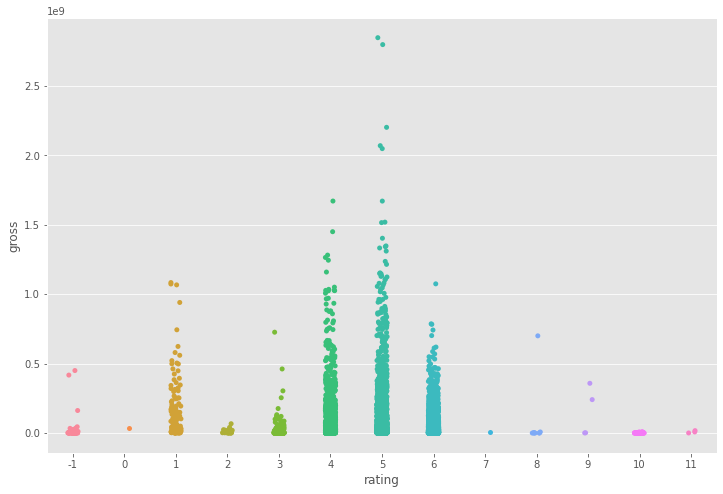

In [29]:
sns.stripplot(x="rating", y="gross", data=df)
